# Calsificación sobre Dataset de Cancer

### 1. Realizamos las importaciones necesarias

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

### 2. Cargamos el dataset que es propio de la libreria sklearn y mostramos su contenido

In [2]:
cancer = datasets.load_breast_cancer()
datos = np.column_stack((cancer.data, cancer.target))
datos = pd.DataFrame(datos,columns = np.append(cancer.feature_names, "MB"))
datos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,MB
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


### 3. Creamos un cojunto de datos de entrenamiento y uno de prueba

In [3]:
# Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(datos.drop(columns = "MB"),
                                        datos['MB'],
                                        test_size=0.3,
                                        random_state=109) # 70% training and 30% test

### 4. Creamos el modelo SVM con kernel lineal y lo entrenamos

In [4]:
# Crear un clasificador svm
clf = svm.SVC(kernel='linear') # Linear Kernel

# Entrene el modelo usando los conjuntos de entrenamiento
clf.fit(X_train, y_train)

SVC(kernel='linear')

### 5. Realizamos una prediccion utilizando el SVM anterior con los datos para testeo y mostramos diferentes metricas

In [11]:
# Predecir la respuesta para el conjunto de datos de prueba
y_pred = clf.predict(X_test)

# Exactitud del modelo: ¿con qué frecuencia es correcto el clasificador?
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))

# Precisión del modelo: ¿qué porcentaje de tuplas positivas se etiquetan como tales?
print("Presición:",metrics.precision_score(y_test, y_pred))

# Recordatorio de modelos: ¿qué porcentaje de tuplas positivas se etiquetan como tales?
print("Recuperacion:",metrics.recall_score(y_test, y_pred))

Exactitud: 0.9649122807017544
Presición: 0.9811320754716981
Recuperacion: 0.9629629629629629


### 6. Graficamos el resultado

In [6]:
#Se importan los datos
X = X_train
y = y_train

h = .02


#Se crean los marcos para las gráficas
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))


Xpred = np.array([xx.ravel(), yy.ravel()] + [np.repeat(0, xx.ravel().size) for _ in range(30)]).T

# Xpred ahora tiene una cuadrícula para x1 y x2 y un valor promedio (0) para x3 a x13
pred = clf.predict(Xpred).reshape(yy.shape)   # es una matriz de 0 y 1!
plt.contourf(xx, yy, pred,
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.show()

ValueError: X.shape[1] = 2 should be equal to 30, the number of features at training time

<Figure size 432x288 with 0 Axes>

### 7. Creamos el modelo SVM con kernel polinomico y lo entrenamos

In [8]:
# Crear un clasificador svm
svclassifier = svm.SVC(kernel='poly', degree=8) # Polinomial Kernel

# Entrene el modelo usando los conjuntos de entrenamiento
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

### 8. Realizamos una prediccion utilizando el SVM anterior con los datos para testeo y mostramos diferentes metricas

In [12]:
# Predecir la respuesta para el conjunto de datos de prueba
y_pred = svclassifier.predict(X_test)

# Exactitud del modelo: ¿con qué frecuencia es correcto el clasificador?
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))

# Precisión del modelo: ¿qué porcentaje de tuplas positivas se etiquetan como tales?
print("Presición:",metrics.precision_score(y_test, y_pred))

# Recordatorio de modelos: ¿qué porcentaje de tuplas positivas se etiquetan como tales?
print("Recuperacion:",metrics.recall_score(y_test, y_pred))

Exactitud: 0.9005847953216374
Presición: 0.864
Recuperacion: 1.0


### 9. Graficamos el resultado

In [10]:
#Se importan los datos
X = X_train
y = y_train

h = .02

#Se crean los marcos para las gráficas
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))


Xpred = np.array([xx.ravel(), yy.ravel()] + [np.repeat(0, xx.ravel().size) for _ in range(30)]).T

# Xpred ahora tiene una cuadrícula para x1 y x2 y un valor promedio (0) para x3 a x13
pred = svclassifier.predict(Xpred).reshape(yy.shape)   # es una matriz de 0 y 1!
plt.contourf(xx, yy, pred,
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.show()

ValueError: X.shape[1] = 32 should be equal to 30, the number of features at training time

Como se observa no se logro graficar los SVM y los siguientes bloques de codigos fueron las muestras que se tomaron para intentar hacerlo. 

Se utilizo cada una de las siguientes formas, pero no se logro obtener los graficos. 

El siguiente es sobre numeros creados con numpy

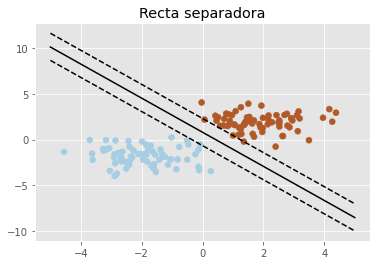

In [16]:
# Se crean los datos
np.random.seed(0)
X = np.r_[np.random.randn(70, 2) - [2, 2], np.random.randn(70, 2) + [2, 2]]
Y = [0] * 70 + [1] * 70

#Se estima el modelo
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# Se construye la recta que separa las clases
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

#Gráfica
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
 s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.title('Recta separadora')
plt.axis('tight')
plt.show()

Este usa tres kernels diferentes sobre el dataset iris

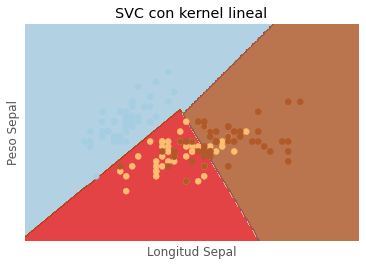

In [45]:
#Se importan los datos
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

h = .02

#Parámetro de regularización
C = 1.0 

svc = svm.SVC(kernel='linear', C=C).fit(X, y)


#Se crean los marcos para las gráficas

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

#Color en las gráficas
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

#Puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Longitud Sepal')
plt.ylabel('Peso Sepal')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC con kernel lineal')

plt.show()

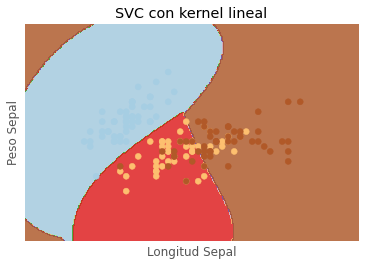

In [46]:
#Se importan los datos
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

h = .02

#Parámetro de regularización
C = 1.0 

rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)


#Se crean los marcos para las gráficas

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])

#Color en las gráficas
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

#Puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Longitud Sepal')
plt.ylabel('Peso Sepal')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC con kernel lineal')

plt.show()

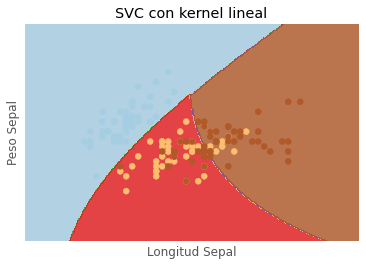

In [47]:
#Se importan los datos
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

h = .02

#Parámetro de regularización
C = 1.0 

poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)


#Se crean los marcos para las gráficas

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])

#Color en las gráficas
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

#Puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Longitud Sepal')
plt.ylabel('Peso Sepal')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC con kernel lineal')

plt.show()